##Earthquake Anomaly Detection Using DBSCAN

In [20]:
### importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [21]:
### loading the dataset
df = pd.read_csv(r"C:\Users\sreya\Documents\database.csv")

In [22]:
### see the basic structure
df.shape

(23412, 21)

In [23]:
### checking for the Missing Values
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [24]:
###Dealing with the missing values
df = df.drop(columns=[
    'Depth Error', 'Depth Seismic Stations', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'
])
###keep only the necessary columns
df = df[['Latitude','Longitude', 'Depth', 'Magnitude']]

### drop the rows with the missing values
df = df.dropna()

In [25]:
### printing the new dataset
print(df.shape)

(23412, 4)


In [27]:
print(df.columns)### Printing only the column names

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude'], dtype='object')


In [28]:
### standarization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[['Latitude','Longitude', 'Depth', 'Magnitude']])

In [29]:
###Applying  DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
labels = dbscan.fit_predict(x_scaled)

In [30]:
###Add cluster labels to the dataframe
df['Cluster'] = labels

In [31]:
### checking how many clusters are formed
print(df['Cluster'].value_counts())

Cluster
 0    23114
-1      171
 1       81
 4       10
 6        9
 7        9
 2        8
 3        5
 5        5
Name: count, dtype: int64


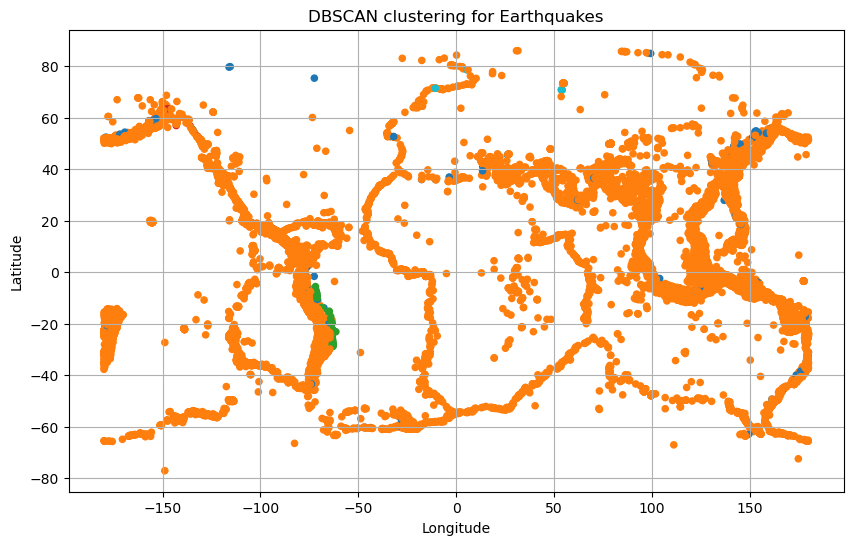

In [32]:
###visualization into 2D
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], c = df['Cluster'], cmap = 'tab10', s = 20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN clustering for Earthquakes")
plt.grid(True)
plt.show()

In [33]:
### checking for the outlier
print(df[df['Cluster'] == -1].head())

     Latitude  Longitude  Depth  Magnitude  Cluster
16     51.251    178.715   30.3        8.7       -1
87     36.405     70.724  207.8        7.4       -1
237    -5.714    128.493  330.0        6.7       -1
464    -7.240    124.583  531.8        7.0       -1
613    52.812    -34.140   10.0        7.0       -1


In [34]:
### save the output to the csv file
df.to_csv("Output saved to the dbscan_result.csv", index = False)
print("Output saved to 'earthquake_dbscan_results.csv'")

Output saved to 'earthquake_dbscan_results.csv'


In [35]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [36]:
import folium

# Initialize map (fixed spelling of location)
map = folium.Map(location=[0, 0], zoom_start=2)

# Add circle markers for earthquakes
for _, row in df.iterrows():
    color = 'red' if row['Cluster'] == -1 else 'blue'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(map)

# Save map to file
map.save("earthquake_dbscan_map.html")
print("✅ Interactive map saved as 'earthquake_dbscan_map.html'")


✅ Interactive map saved as 'earthquake_dbscan_map.html'


In [37]:
import os

file_path = os.path.abspath("earthquake_dbscan_map.html")
print("🔍 Your HTML file is located at:\n", file_path)


🔍 Your HTML file is located at:
 c:\Users\sreya\Documents\earthquake_dbscan_map.html
